In [33]:
pip install roms-tools[dask]

In [34]:
from roms_tools import Grid

In [35]:
grid = Grid(
    nx=91,  # number of grid points in x-direction
    ny=61,  # number of grid points in y-direction
    size_x=9100,  # domain size in x-direction (in km)
    size_y=6100,  # domain size in y-direction (in km)
    center_lon=75,  # longitude of the center of the domain
    center_lat=0,  # latitude of the center of the domain
    rot=0,  # rotation of the grid (in degrees)
    topography_source={
        "name": "SRTM15",
        "path": "/content/SRTM15_V2.6_IO_1deg.nc",
    },
    N=50,  # number of vertical layers
    verbose=True,
)



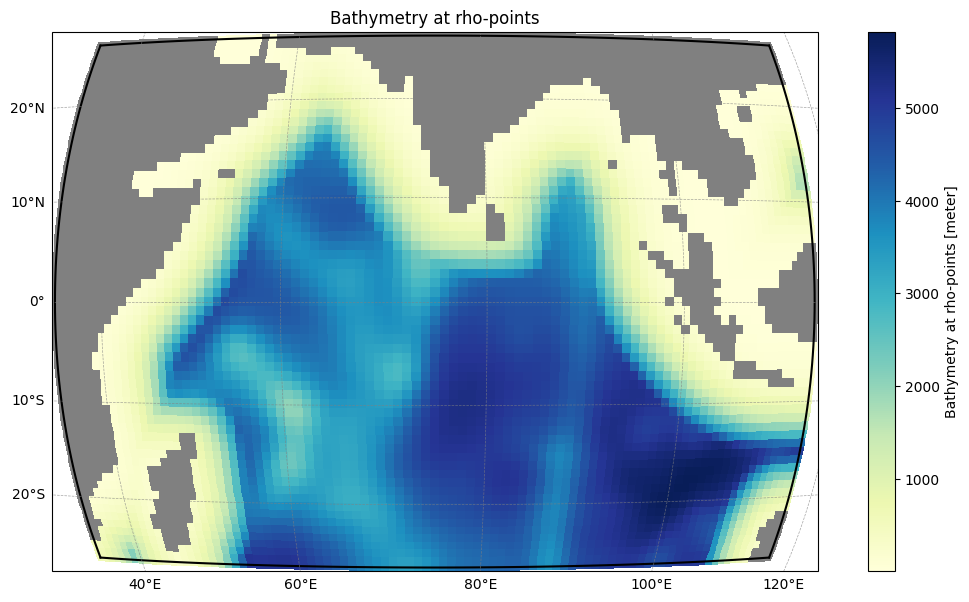

In [36]:
grid.plot()

In [37]:
grid.save('IO_1deg.nc')

[PosixPath('IO_1deg.nc')]

Text(0.5, 1.0, 'Vertical stretching function at rho-points')

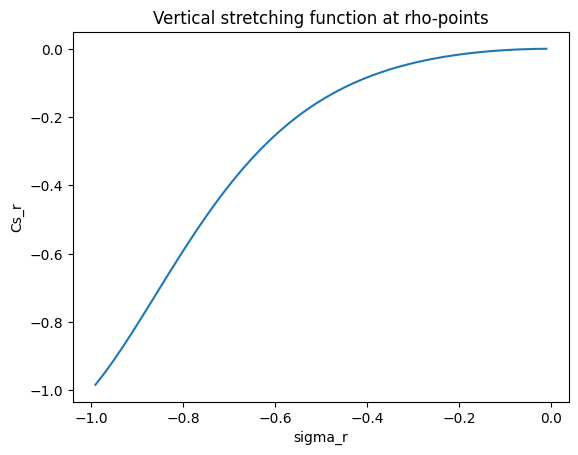

In [38]:
import matplotlib.pyplot as plt
plt.plot(grid.ds.sigma_r, grid.ds.Cs_r)
plt.xlabel("sigma_r")
plt.ylabel("Cs_r")
plt.title("Vertical stretching function at rho-points")



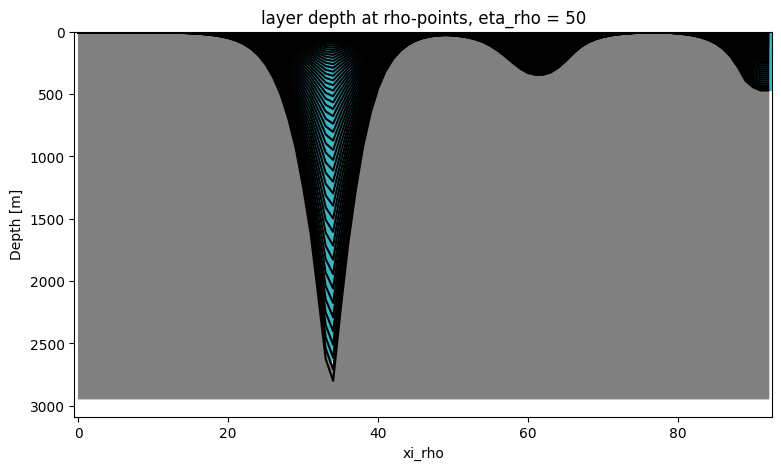

In [39]:
grid.plot_vertical_coordinate(eta=50)

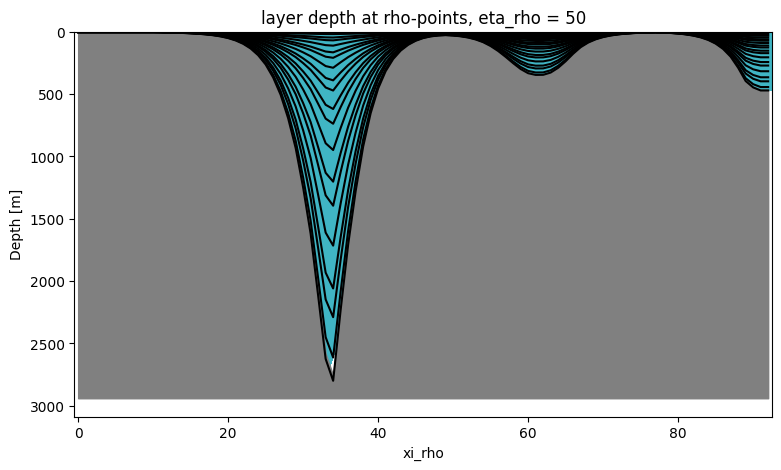

In [40]:
grid.plot_vertical_coordinate(eta=50, max_nr_layer_contours=20)

In [41]:
path = '/content/GLORY_Jan*nc'

In [42]:
from datetime import datetime
ini_time = datetime(1993, 1, 16, 12, 0, 0)

In [48]:
from roms_tools import InitialConditions,BoundaryForcing

In [47]:

initial_conditions = InitialConditions(
    grid=grid,
    ini_time=ini_time,
    source={"name": "GLORYS", "path": path},
    model_reference_date=datetime(1993, 1, 16), # this is the default
    use_dask=True,
)

In [44]:
initial_conditions.ds.ubar.compute()

<xarray.DataArray 'ubar' (ocean_time: 1, eta_rho: 63, xi_u: 92)> Size: 23kB
array([[[-1.89911470e-01, -1.77507550e-01, -1.25375748e-01, ...,
          2.34580506e-02,  5.25101228e-03, -5.67063969e-03],
        [-1.19376227e-01, -2.47376040e-01, -1.98662937e-01, ...,
         -4.24143036e-05, -8.52201693e-03, -1.04862815e-02],
        [-3.86464670e-02, -9.41889808e-02, -1.49866790e-01, ...,
         -7.18587637e-03, -1.22937122e-02, -1.30293444e-02],
        ...,
        [ 5.27178915e-03,  9.19540355e-04, -3.74187715e-02, ...,
         -7.79381767e-02, -8.06063265e-02, -8.53000209e-02],
        [-3.59654129e-02, -4.37364206e-02, -1.92851257e-02, ...,
         -7.98992813e-02, -8.34602341e-02, -8.86674300e-02],
        [ 1.56448688e-03,  1.98901035e-02,  1.66846346e-02, ...,
         -7.69518167e-02, -8.03260207e-02, -8.50943178e-02]]],
      dtype=float32)
Coordinates:
    abs_time    (ocean_time) datetime64[ns] 8B 1993-01-16T12:00:00
  * ocean_time  (ocean_time) float64 8B 4.32e+04
Dimensions without coordinates: eta_rho, xi_u
Attributes:
    long_name:  vertically integrated u-flux component
    units:      m/s

[########################################] | 100% Completed | 935.60 ms


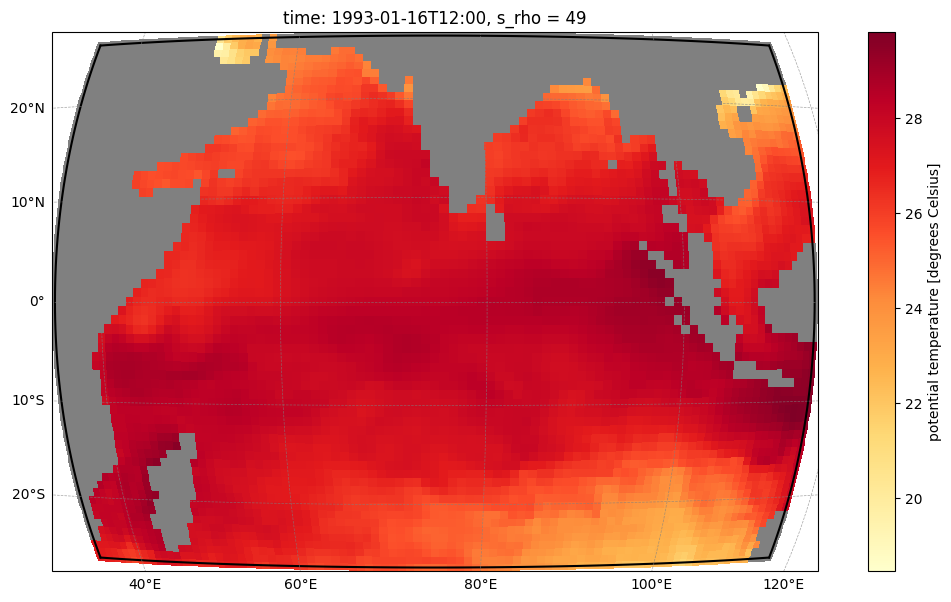

In [45]:
initial_conditions.plot("temp", s=-1)

In [46]:
initial_conditions.ds.to_netcdf('Initial.nc')

In [51]:
start_time = datetime(1993, 1, 16)
end_time = datetime(1993, 1, 16)


In [52]:

boundary_forcing = BoundaryForcing(
    grid=grid,
    start_time=start_time,
    end_time=end_time,
    boundaries={
        "south": True,
        "east": True,
        "north": False,  # northern boundary excluded
        "west": False,
    },
    source={"name": "GLORYS", "path": path},
    type="physics",  # "physics" or "bgc"; default is "physics"
    model_reference_date=datetime(2000, 1, 1), # this is the default
    use_dask=True,
)







[########################################] | 100% Completed | 104.60 ms


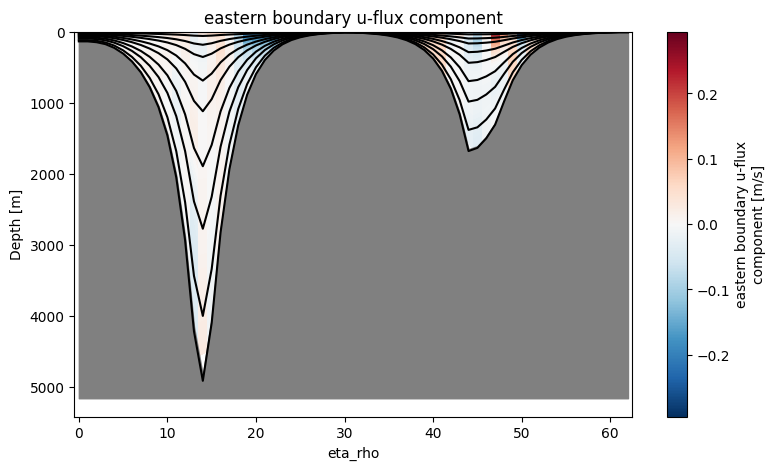

In [55]:
boundary_forcing.plot("u_east", time=0, layer_contours=True)